## 2019-2022 COVID19 股市波動
- 科技：AAPL  MSFT  GE. IBM
- 航空：AA  DAL. UAL
- 軟性飲料：KO  PEP
- 餐飲：YUM  MCD  SBUX

In [2]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, date

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import pandas_datareader as pdr

def get_stock_data(ticker, start, end):
    data = pdr.data.DataReader(ticker, 'yahoo', start, end)
    data.insert(0, "Ticker", ticker)
    return data

def get_multiple_data(tickers, start, end):
    stocks = dict()
    for ticker in tickers:
        s = get_stock_data(ticker, start, end)
        stocks[ticker] = s
    return stocks

In [21]:
tickers = ['AAPL','MSFT','GE','IBM','AA','DAL','UAL','PEP','KO','YUM', 'MCD', 'SBUX']
start = datetime(2019,1,1)
end = datetime(2021,12,31)
raw = get_multiple_data(tickers, start, end)

In [26]:
type(raw['AAPL'])

pandas.core.frame.DataFrame

In [22]:
raw['PEP'][:5]

           Ticker        High         Low        Open  \
Date                                                    
2018-12-31    PEP  111.089996  109.320000  110.580002   
2019-01-02    PEP  110.019997  108.230003  109.150002   
2019-01-03    PEP  110.150002  108.050003  108.910004   
2019-01-04    PEP  110.599998  108.239998  109.540001   
2019-01-07    PEP  110.379997  108.650002  110.010002   

                 Close     Volume   Adj Close  
Date                                           
2018-12-31  110.480003  5019100.0  101.298683  
2019-01-02  109.279999  4835400.0  100.198387  
2019-01-03  108.260002  5975900.0   99.263168  
2019-01-04  110.480003  6293900.0  101.298683  
2019-01-07  109.529999  5220300.0  100.427620  

In [33]:
# 取Close --> DataFrame
def pivot_tickers_to_columns(raw, column):
    items = []
    for key in raw:
        data = raw[key]
        items.append(data[["Ticker",column]])
#     print(items)
    combined = pd.concat(items)
#     print(combined)
    ri = combined.reset_index()
#     print(ri)
    return ri.pivot("Date","Ticker",column)

In [34]:
close_price = pivot_tickers_to_columns(raw, "Close")
close_price[:5]

Ticker         AA       AAPL        DAL  ...       SBUX  \
Date                                     ...              
2018-12-31  26.58  39.435001  49.900002  ...  64.400002   
2019-01-02  26.24  39.480000  50.090000  ...  64.320000   
2019-01-03  26.24  35.547501  45.610001  ...  61.529999   
2019-01-04  28.34  37.064999  47.790001  ...  63.570000   
2019-01-07  28.42  36.982498  47.849998  ...  63.570000   

Ticker            UAL        YUM  
Date                              
2018-12-31  83.730003  91.919998  
2019-01-02  84.180000  91.440002  
2019-01-03  80.000000  89.139999  
2019-01-04  82.680000  91.459999  
2019-01-07  83.230003  91.360001  

[5 rows x 12 columns]

### 收盤價走勢 
- 科技股
- 航空股
- 軟性飲料
- 餐廳

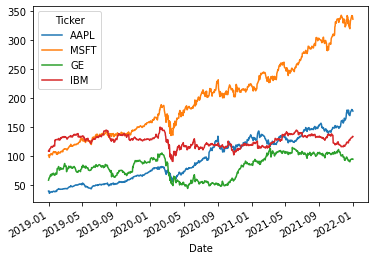

In [59]:
close_price[['AAPL','MSFT','GE','IBM']].plot(); 

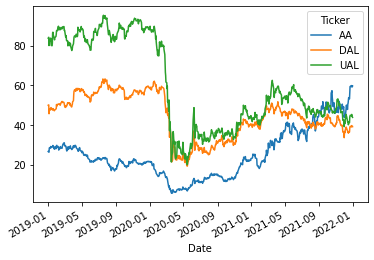

In [60]:
close_price[['AA','DAL','UAL']].plot();

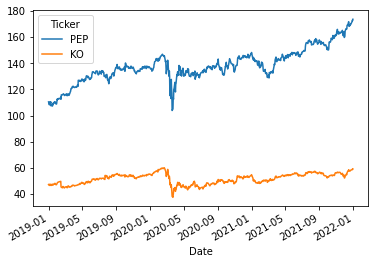

In [61]:
close_price[['PEP','KO']].plot();

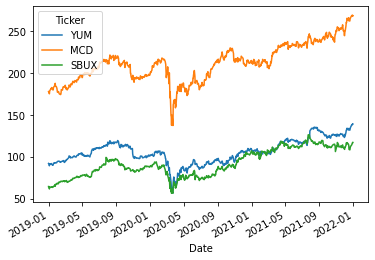

In [62]:
close_price[['YUM', 'MCD', 'SBUX']].plot();

### Microsoft 收盤價/成交量

In [42]:
volumes = pivot_tickers_to_columns(raw, "Volume")

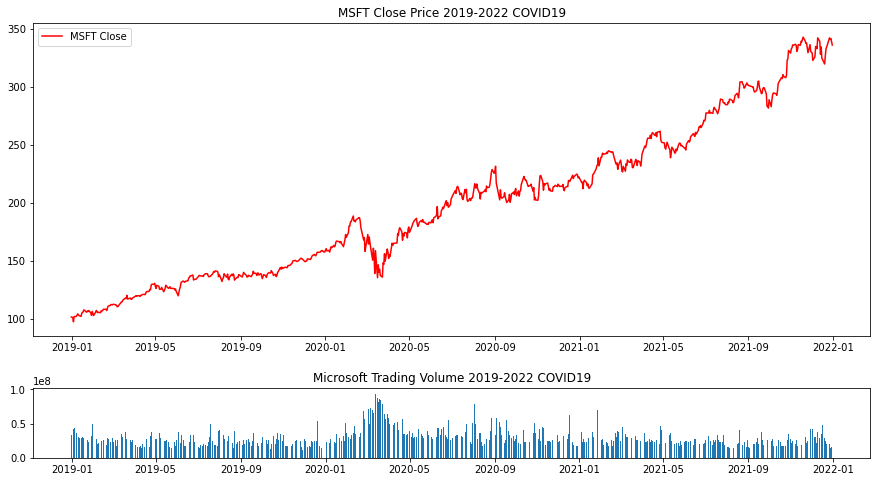

In [56]:
#price history
top = plt.subplot2grid((4,4),(0,0),rowspan=3,colspan=4)
top.plot(close_price['MSFT'].index, close_price['MSFT'], label='MSFT Close',color='r')
plt.title('MSFT Close Price 2019-2022 COVID19')
plt.legend(loc=2);

#volume
msft_volume = volumes[['MSFT']]
bottom = plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4)
bottom.bar(msft_volume.index, msft_volume['MSFT'])
plt.title('Microsoft Trading Volume 2019-2022 COVID19')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

### UAL 收盤價/成交量

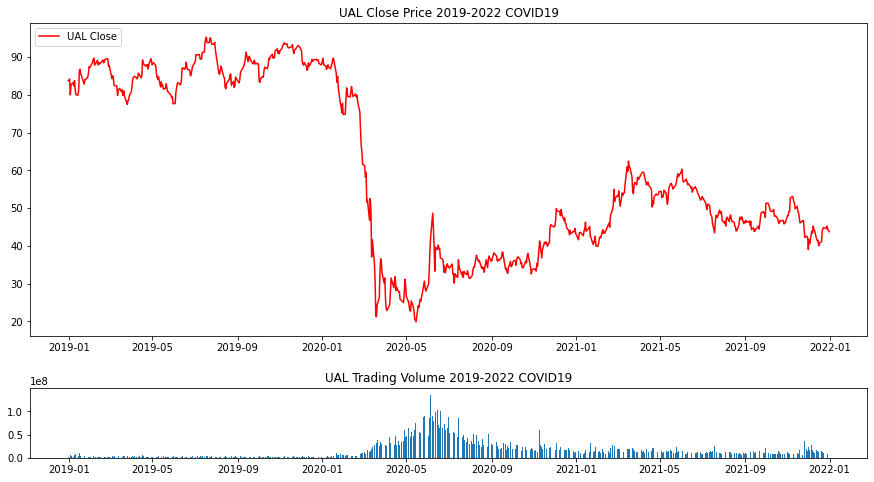

In [63]:
#price history
top = plt.subplot2grid((4,4),(0,0),rowspan=3,colspan=4)
top.plot(close_price['UAL'].index, close_price['UAL'], label='UAL Close',color='r')
plt.title('UAL Close Price 2019-2022 COVID19')
plt.legend(loc=2);

#volume
msft_volume = volumes[['UAL']]
bottom = plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4)
bottom.bar(msft_volume.index, msft_volume['UAL'])
plt.title('UAL Trading Volume 2019-2022 COVID19')
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)

### 每日收盤價變化百分比
> 不考慮股利及其他因素

$$r_1= {P_t \over P_{t-1}}-1$$

In [64]:
daily_price = close_price/close_price.shift(1) - 1

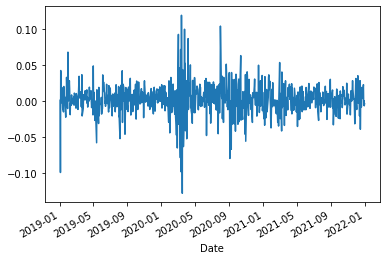

In [66]:
daily_price['AAPL'].plot();

### 每日累計報酬率
$$i_t = (1+r_t) \times i_{t-1}, i_0 = 1$$

In [67]:
daily_cumulative = (1+daily_price).cumprod()

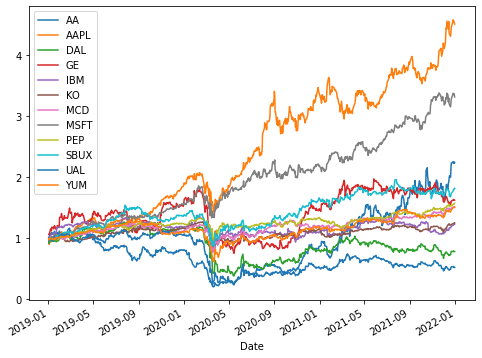

In [69]:
daily_cumulative.plot(figsize=(8,6))
plt.legend(loc=2);

### 報酬率分佈

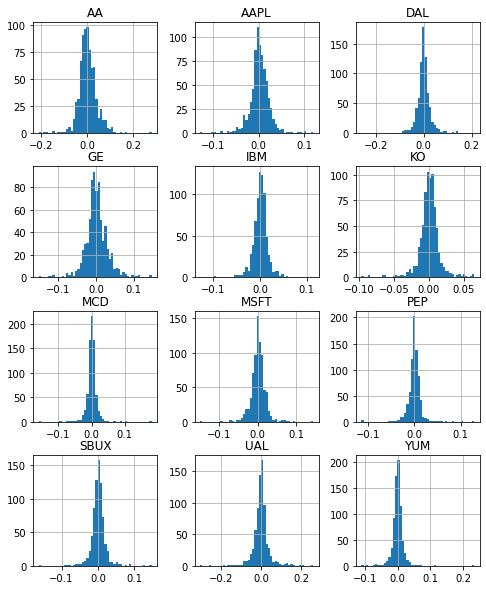

In [75]:
daily_price.hist(bins=50, figsize=(8,10));

### 依收盤價變化百分比找出相關性

In [76]:
corrs = daily_price.corr()

In [77]:
corrs

Ticker        AA      AAPL       DAL  ...      SBUX  \
Ticker                                ...             
AA      1.000000  0.325844  0.568357  ...  0.418565   
AAPL    0.325844  1.000000  0.313120  ...  0.559271   
DAL     0.568357  0.313120  1.000000  ...  0.510859   
GE      0.549526  0.341664  0.587572  ...  0.468407   
IBM     0.508104  0.457009  0.490656  ...  0.544638   
...          ...       ...       ...  ...       ...   
MSFT    0.300594  0.773024  0.289895  ...  0.618632   
PEP     0.277688  0.567054  0.285160  ...  0.603635   
SBUX    0.418565  0.559271  0.510859  ...  1.000000   
UAL     0.598847  0.283003  0.910501  ...  0.488309   
YUM     0.404266  0.422393  0.477792  ...  0.682927   

Ticker       UAL       YUM  
Ticker                      
AA      0.598847  0.404266  
AAPL    0.283003  0.422393  
DAL     0.910501  0.477792  
GE      0.591321  0.400562  
IBM     0.449497  0.504083  
...          ...       ...  
MSFT    0.263023  0.464475  
PEP     0.214896  0.472

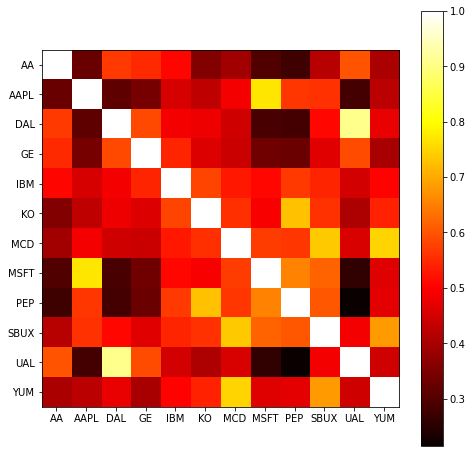

In [78]:
plt.imshow(corrs, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corrs)), corrs.columns)
plt.yticks(range(len(corrs)), corrs.columns)
plt.gcf().set_size_inches(8,8)

### 決定風險相對於期望報酬率的關係
- 航空業風險最高，而只有AA有相對的回報
- 科技業風險中等，回報高
- 飲料食品業相對保守

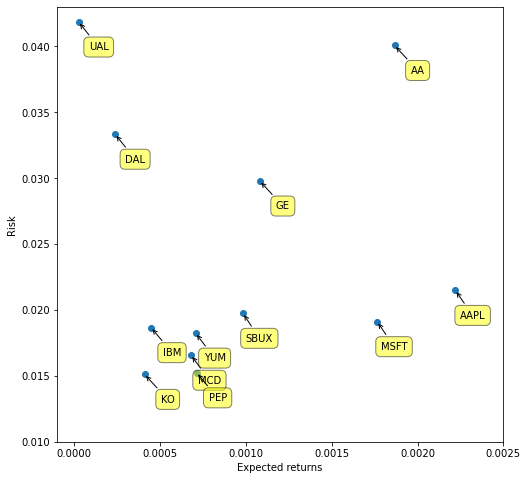

In [92]:
plt.scatter(daily_price.mean(), daily_price.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(daily_price.columns, daily_price.mean(), daily_price.std()):
    plt.annotate(label, xy = (x,y) ,xytext=(30,-30), textcoords='offset points', ha='right',
                va='bottom',bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.xlim(-0.0001,0.0025)
plt.ylim(0.010,0.0430)

plt.gcf().set_size_inches(8,8)